In [1]:
#from IPython.core.display import HTML
from datascience import *
import itertools
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import os
#plt.style.use('fivethirtyeight')

import networkx as nx

%matplotlib inline

#np.random.seed(99)

# Calculating the clustering coefficient

In this demo, we are going to calculate the average clustering coefficient of a network. We will start with a small, toy network and then we will move on to analyze a complete network dataset from the [Add Health project](http://www.cpc.unc.edu/projects/addhealth).

## Calculating average clustering coefficient by hand

Consider the network created by the following code.

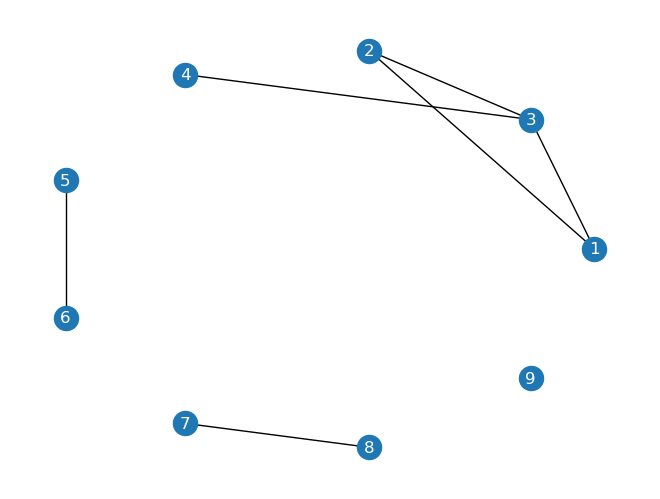

In [2]:
ex_network = nx.Graph([(1,3), (2,3), (1,2), (3,4), (5,6), (7,8)])
ex_network.add_node(9)
nx.draw_circular(ex_network, with_labels=True, font_color='white')


**For each node in the above graph, let'scalculate the following things:**
* Degree of the node, 
* Number of pairs of neighbors of the node,
* Number of the pairs of neighbors that are directly connected with each other

We'll write down the answer as a table with the following four columns:
1) NodeId, 2) Degree of the node, 3) Number of pairs of neighbors, 4) Number of the pairs of the neighbors that are directly connected

*Hint: Remember that the number of pairs of neighbors of the node refers to the number of possible connections between a node's neighbors. For example, node 3 is connected to 1, 2, and 4 so there's three possible connections: (1,2) (1,4) (2,4)*

| Node ID | Degree | # pairs nbrs | # pairs nbrs connected |
| ---     | ---    | ---          | ---                    |
|  1      |  ?     |  ?           |  ?                     |
|  2      |  ?     |  ?           |  ?                     |
|  3      |  ?     |  ?           |  ?                     |
|  4      |  ?     |  ?           |  ?                     |
|  5      |  ?     |  ?           |  ?                     |
|  6      |  ?     |  ?           |  ?                     |
|  7      |  ?     |  ?           |  ?                     |
|  8      |  ?     |  ?           |  ?                     |
|  9      |  ?     |  ?           |  ?                     |


Recall that the **clustering coefficient** of a node is the proportion of the pairs of the neighbors that are connected to each other; in other words, it quantifies the extent to which a node's friends are friends with one another.

For each node in the above mentiond graph, let's calculate the clustering coefficient:

| Node ID | Clustering coefficient |
| ---     | ---    |
|  1      |  ?     |
|  2      |  ?     |
|  3      |  ?     |
|  4      |  ?     |
|  5      |  ?     |
|  6      |  ?     |
|  7      |  ?     |
|  8      |  ?     |
|  9      |  ?     |


In [ ]:
clustering_coef = (1+1+0.333+0+0+0+0+0+0)/9 
clustering_coef

### Calculating the average clustering coefficient using the `networkx` package

The `networkx` library provides a function, `average_clustering`, that can be used to calculate the average clustering coefficient of a graph. Use the `average_clustering` method to calculate the average clustering coefficient of the above graph.  

The average clustering coefficient calculated by this function should be the same with your answer calculated by hand.

In [ ]:
nx.average_clustering(ex_network)

## Clustering coefficients in real world Add Health networks

Now let's calculate the average clustering coefficient for real world networks from the Add Health study.

To start, this function will be helpful: it reads the data in for a single Add Health network.

In [ ]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

Now let's use this function to actually read in all 84 of the Add Health school networks:

In [ ]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]
# Running this cell will take a few seconds
# now add_health_networks is an object containing 84 networks

Let's calculate the average clustering coefficient for **the first network** in the Add Health study.

In [ ]:
g = add_health_networks[0] # get the network at the first index
cc_nx = nx.average_clustering(g)
print ('Average clustering coefficient calculated by the networkx library', cc_nx)

# Calculating clustering coefficient for all of the Add Health networks

Now let's calculate the clustering coefficient for each network, making a `Table` with the results:

In [ ]:
cc_ah = make_array()

for g in add_health_networks:
    cc_ah = np.append(cc_ah, nx.average_clustering(g)) # np.append will append the new results to the end of original array
                                                # np.append(the original array, the new element), check np.append? for more info
                                                # we want to make an array of all the clustering coefficients for all the 84 networks

add_health_df = Table().with_columns([  # here we want to make a table for these coefficients
     'id', np.arange(1, number_add_health_networks+1), # the first column has the ids of the nodes
     'clustering_coeff', cc_ah                         # the second column has the clustering coefficient
    ])

add_health_df

Finally, let's visualize these results.  We might wonder how much the clustering coefficient changes from community to community. What do the results show?

In [ ]:
add_health_df.hist('clustering_coeff' )

### Answers to by hand questions at the top of the demo

```
 Columns: NodeId, Degree of the node, Number of pairs of neighbors, Number of the pairs of the neighbors that are directly connected
 
 1,2,1,1
 2,2,1,1
 3,3,3,1 
 4,1,0,0
 5,1,0,0
 6,1,0,0
 7,1,0,0
 8,1,0,0
 9,0,0,0
```

```
 Columns: NodeId, Clustering Coefficient
 1,1
 2,1
 3,0.333
 4,0
 5,0
 6,0
 7,0
 8,0
 9,0
```